# Lending Club Case Study

## 1. Objective

    1.Problem Statement
    2.Goal

### 1.1. Problem Statement

Lending Club, a consumer finance marketplace that specializes in providing a diverse range of loans to urban customers, faces a significant challenge in optimizing its loan approval process. When assessing loan applications, the company must make informed decisions to minimize financial losses, particularly those arising from loans extended to applicants deemed "risky."

These financial losses, known as credit losses, occur when borrowers fail to repay their loans or default on their obligations. In essence, borrowers classified as "charged-off" contribute the most substantial losses to the company.

The primary objective of this initiative is to help Lending Club reduce credit losses while navigating two critical scenarios:

Identifying Creditworthy Applicants: It is essential to recognize applicants who are likely to repay their loans. Approving these individuals can yield profits for the company through interest payments. Conversely, rejecting such applicants could result in missed business opportunities.

Avoiding Risky Loans: Conversely, approving loans for applicants unlikely to repay their debts poses a risk of significant financial losses for the company. Effective risk assessment is crucial to prevent extending credit to these high-risk individuals.

By addressing these scenarios, Lending Club can enhance its loan approval process, striking a balance between maximizing potential profits and minimizing credit losses.

### 1.2. Goal
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

## 2.Basic Data Undersatnding

    1.Overall Data status
    2.key columns

### 2.1. Overall Data Status

The data set (loan.csv) provided has 39717 rows and 111 coloumns which include multiple atributes related to the "customer" and "loan"information





### 2.2 Key columns

Since our goal is to find the features which influence  default of loan, "loan_status" is our target variable.

Target Variable -   "loan_status".    

     "loan_status"  column has three distinct values:    
                        Fully Paid: Indicates that the borrower has successfully repaid the loan without defaulting.  
                        Charged Off: Refers to loans where the borrower has defaulted and the lender no longer expects to recover the remaining amount.  
                        Current: Represents ongoing loans, where the borrower is still making payments. It is uncertain at this stage whether these loans will be fully repaid or default in the future, so they are excluded from the default analysis for now.  

other key columns: 
 
        Customer Information: 
                a)annual_inc- it is the self-reported annual income provided by the borrower during registration.
                b)verification_status-whether the income provided by the customer is verified or not
                c)emp_title-Job title provided by the customer while applyig for loan
                d)emp_length-tenure of employement
                e)home_ownership-  Indicates whether the customer owns a home or rents.
                f)dti(Debt to Income ratio): Measures how much of a person's monthly income is already being used to pay off their debts. 
                g)addr_state- Customer location information
                
        Loan Information:  
               a)loan_amt- the amount of money requested by the borrower as a loan
               b)int_rate -Interest Rate on the loan
               c)purpose -category provided by the borrower for the loan request. 
               d)term-Duration of loan
               e)grade - Agrade assigned to teh borrower based on their credit repaying score
               f)pub_rec_bankruptcies- no of public records related to customer bankruptcy is available-A higher value can be lead to low approval possibilty of teh request
    


## 3. Data cleaning and Manipulation
    1.Loading the data set
    2.Checking the null values status
    3.Dropping Null value records
    4.Checking duplicate records
    5.Checking unique value status
    6.Dropping single value records
    7.Dropping columns that dosen't contribute to analysis
    8.Imputing values in null columns
    9.Dropping rows based on null values (which cannot be imputed)
    10.Data type conversions
    11.Detecting outliers and its treatement
    12.Derived columns
    13.create a subset of data frame only for loan_status ='Charged Off'
    14.create a subset of data frame for loan_status  'Fully paind' & 'Charged Off'
    

In [1]:
# importing  the required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# supress warnings
import warnings
warnings.filterwarnings(action="ignore") 

#set max display rows
pd.set_option('display.max_rows' ,100)

### 3.1. Loading the data set

In [2]:
#import the data set

loan_df=pd.read_csv(r"C:COURSE 1- Stats and EDA\Module 8 Lending club case study\loan\loan.csv")

In [3]:
print(f"No of Rows: {loan_df.shape[0]}")  # Check the number of rows

print(f"No of Columns: {loan_df.shape[1]}")  # Check the number of columns

print(loan_df.info())  # Check basic data types and non-null values


No of Rows: 39717
No of Columns: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [4]:
loan_df.head()  # Display the first 5 rows of the dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
round(loan_df['loan_status'].value_counts()/len(loan_df)*100,2) #checking the ditribution of data based on loan status

loan_status
Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: count, dtype: float64

### 3.2 Checking the null values status

       1.54 columns contains 100 % Null valuues
       2.2 columns contains null value above 90 %
       3.1 column conatins null value above 60 %
       4.43 column dosen't have any null values

In [6]:
# function to check detailed missing values status

def check_nullval(data):
    
    # Calculate percentage of missing values
    missing_values = (data.isnull().sum() / len(data)) * 100

    # Columns with 100% null values
    print(f"No of columns with 100% null values: {len(missing_values[missing_values == 100])}")

    # Columns with more than or above 50% null values
    print(f"No of columns with more than  or above 50% null values: {len(missing_values[missing_values >= 50])}")

    # Columns with no null values
    print(f"No of columns with no null values: {len(missing_values[missing_values == 0])}")

    # Columns with less than 50% null values
    print(f"No of columns with less than 50% null values: {len(missing_values[(missing_values < 50) & (missing_values > 0.00)])}")
    
    print("\nBelow are the columns which have null values and their respective percentages:")

    return missing_values[missing_values > 0].sort_values(ascending=False)


In [7]:
 # checking the null values staus by calling the  function

check_nullval(loan_df)

No of columns with 100% null values: 54
No of columns with more than  or above 50% null values: 57
No of columns with no null values: 43
No of columns with less than 50% null values: 11

Below are the columns which have null values and their respective percentages:


bc_open_to_buy                    100.000000
acc_open_past_24mths              100.000000
bc_util                           100.000000
mo_sin_old_il_acct                100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_rcnt_rev_tl_op             100.000000
mo_sin_rcnt_tl                    100.000000
mort_acc                          100.000000
mths_since_recent_bc              100.000000
mths_since_recent_bc_dlq          100.000000
mths_since_recent_inq             100.000000
mths_since_recent_revol_delinq    100.000000
num_accts_ever_120_pd             100.000000
num_actv_bc_tl                    100.000000
num_actv_rev_tl                   100.000000
num_bc_sats                       100.000000
num_bc_tl                         100.000000
num_il_tl                         100.000000
num_op_rev_tl                     100.000000
num_rev_accts                     100.000000
num_rev_tl_bal_gt_0               100.000000
num_sats                          100.000000
num_tl_120

### 3.3. Dropping Null value records

    1.Columns which have null values graeter than 50 % are dropped 
    2.In total 51.35 % of columns dropped based on the above criteria

In [8]:
# checking the percentage of columns  will be dropped because of null values

null_columns_dropped = 0
for col in loan_df.columns:
     if loan_df[col].isna().sum() == loan_df.shape[0] or (loan_df[col].isna().sum() / len(loan_df) >= 0.5):
        null_columns_dropped += 1
        
print(f'Percentage of dropped columns = {round(null_columns_dropped / loan_df.shape[1] * 100, 2)}')


Percentage of dropped columns = 51.35


In [9]:
# dropping columns with more than 50% null values

loan_df = loan_df.loc[:, (loan_df.isnull().sum() / len(loan_df) * 100) < 50]

# checking null values in  new df

check_nullval(loan_df)

No of columns with 100% null values: 0
No of columns with more than  or above 50% null values: 0
No of columns with no null values: 43
No of columns with less than 50% null values: 11

Below are the columns which have null values and their respective percentages:


desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

### 3.4.  Checking duplicate records

1.No duplicate records found in the data set

In [10]:
dup_records=loan_df.duplicated().sum() #dupicate records checking

print(f'No of duplicate records:{dup_records}')

No of duplicate records:0


### 3.5.Checking unique value status

1. 9 Columns having only one unique values, which dosen't contribute to analysis, will drop off those cols

In [11]:
single_value_cols=loan_df.loc[:,loan_df.nunique()==1] #columns iwth single unique values

print(f'No of columns with single value {single_value_cols.shape[1]}')

No of columns with single value 9


### 3.6 Dropping single value records

1.In total 9 cols are dropped beacuse of single unique values which is 16.7 % of total cols (after null cols removal)

In [12]:
# checking the percentage of columns  will be dropped because of single unique value

single_unique_val_columns_dropped = 0
for col in loan_df.columns:
     if loan_df[col].nunique() == 1 :
        single_unique_val_columns_dropped += 1
        
print(f'Percentage of dropped columns = {round(single_unique_val_columns_dropped / loan_df.shape[1] * 100, 2)}')

Percentage of dropped columns = 16.67


In [13]:
single_value_cols #columns iwth single unique values

loan_df = loan_df.drop(columns=single_value_cols) # dropping columns with sinlge unique values

loan_df.shape

(39717, 45)

### 3.7. Dropping columns that dosen't contribute to analysis


1. Since our goal is to identify features that influence whether a customer is likely to default on a loan, there are certain columns that are only available after the loan is approved. These columns won't contribute to our analysis of predicting loan defaults at the application stage.

For example, delinq_2yrs (the number of 30+ days past-due incidences of delinquency in the borrower's credit file over the past two years) is only known after loan approval, so it doesn't help us make decisions before approval. Similarly, columns like total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int,  total_rec_late_fee etc. also fall into this category, as they capture post-loan events. Therefore, we will drop these columns from the analysis.

   ####  cols_to_drop: ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',' total_rec_int, total_rec_late_fee', ' recoveries', 'collection_recovery_fee',' last_pymnt_d', 'last_pymnt_amnt',' last_credit_pull_d',]
  
 #### 18 columns dropped based on above 
 
 2. Similarly ther are certain other customer atributes which dosen't contribute the decision whetehr customer will default or not .for eg : "id'(A unique LC assigned ID for the loan listing.)
 
  #### cols_to_drop;['id','member_id','desc','url','zip_code']
 
    
 #### 5 columns dropped based on above       
        

In [14]:

cols_to_drop= ['delinq_2yrs','earliest_cr_line','inq_last_6mths', 'open_acc', 'revol_bal','revol_util','total_acc', 
               'out_prncp','out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 
              'recoveries','collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d','id','member_id','desc','url'
               ,'zip_code']

In [15]:
# dropping the colms which dosen't contribute to analysis

loan_df = loan_df.drop(columns=cols_to_drop)


In [16]:
loan_df.shape

(39717, 21)

### 3.8.Imputing values in null columns

1.The column emp_title has 6% missing values, and the mode is 'US Army'. Since it doesn’t make logical sense to replace all missing titles with 'US Army',we will  just impute as 'unknown'

2.For the emp_length column, we will impute the missing values with the mode, which is '10+ years',as it is a reasonable assumption for duration.

3.The pub_rec_bankruptcies column has '0' as its mode,but imputing missing values with '0' doesn’t seem appropriate.Therefore, we will drop the rows where pub_rec_bankruptcies is null.

4.For the title column, we will impute the missing values with the mode, which is 'Debt Consolidation', as it is a commonly recurring title in the dataset.

In [17]:
# checking null value status

check_nullval(loan_df)

No of columns with 100% null values: 0
No of columns with more than  or above 50% null values: 0
No of columns with no null values: 17
No of columns with less than 50% null values: 4

Below are the columns which have null values and their respective percentages:


emp_title               6.191303
emp_length              2.706650
pub_rec_bankruptcies    1.754916
title                   0.027696
dtype: float64

In [18]:
loan_df[['emp_title','emp_length','pub_rec_bankruptcies','title']].mode() # checking mode for missing valeus impuattaion

,emp_title,emp_length,pub_rec_bankruptcies,title
0,US Army,10+ years,0.0,Debt Consolidation


In [19]:
mod_val = loan_df[['emp_length', 'title']].mode().iloc[0]  # Calculat the mode for 'emp_length' and 'title'


#ill missing values with the mode for the respective columns

loan_df[['emp_length', 'title']] = loan_df[['emp_length', 'title']].apply(lambda x: x.fillna(mod_val[x.name]))

In [20]:
loan_df['emp_title']=loan_df['emp_title'].fillna('Unknown')

In [21]:
check_nullval(loan_df) # checking the null value status

No of columns with 100% null values: 0
No of columns with more than  or above 50% null values: 0
No of columns with no null values: 20
No of columns with less than 50% null values: 1

Below are the columns which have null values and their respective percentages:


pub_rec_bankruptcies    1.754916
dtype: float64

### 3.9  Dropping rows based on null values (which cannot be imputed)

 There are 697 rows with 'pub_rec_bankruptcies' is null and dropped those rows

In [22]:
#cheking no of rows with pub_rec_bankruptcies 

num_null_rows = loan_df[
    loan_df['pub_rec_bankruptcies'].isnull() 
].shape[0] 

print(f'No of records with pub_rec_bankruptcies is null: {num_null_rows}')

No of records with pub_rec_bankruptcies is null: 697


In [23]:
# dropping rows with pub_rec_bankruptcies is null
loan_df = loan_df[loan_df['pub_rec_bankruptcies'].notna()]

loan_df.shape # checking the df

(39020, 21)

###  3.10. Data type conversions

1.Columns ('funded_amnt_inv','annual_inc','pub_rec_bankruptcies') converted to int64 from float

2.Replaced word'months' from column'term' and converted in to int  

3.Column"issue_d" converted in  to date format  

4.Replaced string '%' from column 'int_rate' and converted in to float 

5.Replaced the values  'Source Verified' values as 'Verified' in 'verificaion_status' column because logically both are same


In [24]:
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
pub_rec                   int64
pub_rec_bankruptcies    float64
dtype: object

In [25]:
# function to change datatype fo columns from float to int64

def float_to_int(data, columns):
    for col in columns:
        data[col] = data[col].astype('int64') 

In [26]:
cols_to_float=['funded_amnt_inv','annual_inc','pub_rec_bankruptcies'] # columns to convert from float to int

float_to_int(loan_df,cols_to_float) # calling the function 

In [27]:
emp_length_impute: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# replacing  values in the 'emp_length' column
loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_impute)

In [28]:
loan_df['term'].unique()

loan_df['term']=loan_df['term'].str.replace(' months','') #replace word 'months'

loan_df['term']=loan_df['term']=loan_df['term'].astype('int64') #convert 'term' to int64

In [29]:
loan_df['issue_d'].unique() #checking issue_date column

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Aug-07'], dtype=object)

In [30]:
#convertint issue_d in to date format
loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'],format='%b-%y') 

In [31]:
loan_df['int_rate'].head() # checking int_rate column data 

loan_df['int_rate']=loan_df['int_rate'].str.replace('%','') #replace string '%'

loan_df['int_rate']=loan_df['int_rate']=loan_df['int_rate'].astype('float') #convert 'int_rate' to float

In [32]:
loan_df.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                       int64
home_ownership                  object
annual_inc                       int64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
title                           object
addr_state                      object
dti                            float64
pub_rec                          int64
pub_rec_bankruptcies             int64
dtype: object

In [33]:
loan_df.verification_status.value_counts() # checking  the value 

loan_df['verification_status']=loan_df['verification_status'].replace('Source Verified', 'Verified') #Replacing the 'Source Verified' values as 'Verified' logically both are same

### 3.11. Detecting outliers and its treatement

1.Annual income has  found with  high values like 6000000 3900000 1900000 etc as outliers,  but it dosen't necessarily mean as an outlier because some customers with high incomes may still need loans and might apply for the loan, so it's not unusual.  

2.interest rates has found with  values like  24.59 24.4  24.11 which shown as outliers, it may seem as high and outlier but are realistic for certain borrowers, especially those considered riskier.

3.Similarly loan_amount columns alos shown up with lot of outliers values like 35000 34800 34675 34525 etc , but its also possible for the company to offer such high loan, so it also cannot be treated an outlier.  

#### Annual Income: High income borrowers are possible, so these values shouldn’t be treated as outliers for this analysis.  
#### Interest Rate: Higher rates can be expected for riskier so these values shouldn’t be treated as outliers for this analysis. 
#### Loan Amout :Higher loan amount can be provided by teh company  so these values shouldn’t be treated as outliers for this analysis

In [34]:
#creating a funcion to check quartile values and outliers of the column


def check_iqr(data, col):
    
    if col not in data.columns:
        print(f"Error:Column '{col}' not found in the DataFrame.")

    
    # Calculate Min,Q1, Q2, Q3, Max and IQR
    
    Minimum_val= data[col].min()
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].quantile(0.50)
    Q3 = data[col].quantile(0.75)
    Maximum_val= data[col].max()
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Quartiles and IQR
    
    print(f"Min value:{Minimum_val}")
    print(f"Q1 or 25th percentile: {Q1}")
    print(f"Q2 or Median: {Q1}")
    print(f"Q3 or 75th percentile: {Q3}")
    print(f"Max value:{Maximum_val}")
    print(f"IQR: {IQR}")
    print(f"Lower bound for outliers: {lower_bound}")
    print(f"Upper bound for outliers: {upper_bound}")
    
    # Categorize values in the column
    
    below_q1 = data[data[col] < Q1][col]
    within_iqr = data[(data[col] >= Q1) & (data[col] <= Q3)][col]
    above_q3 = data[data[col] > Q3][col]
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    
    # Display counts of values in each category
    
    print(f"\nNumber of values below Q1: {below_q1.count()}")
    print(f"Number of values within IQR: {within_iqr.count()}")
    print(f"Number of values above Q3: {above_q3.count()}")
    print(f"Number of outliers: {outliers.count()}")
    sorted_outliers = pd.Series(outliers.unique()).sort_values(ascending=False)
    print(f"Unique outlier values: {sorted_outliers.values}")


In [35]:
check_iqr(loan_df,'annual_inc') # checking quartiles  iqr and outliers  for annual income

Min value:4000
Q1 or 25th percentile: 40800.0
Q2 or Median: 40800.0
Q3 or 75th percentile: 82404.0
Max value:6000000
IQR: 41604.0
Lower bound for outliers: -21606.0
Upper bound for outliers: 144810.0

Number of values below Q1: 9743
Number of values within IQR: 19523
Number of values above Q3: 9754
Number of outliers: 1874
Unique outlier values: [6000000 3900000 1900000 1782000 1440000 1362000 1250000 1200000 1176000
 1080000  948000  900000  889000  840000  828000  800000  780000  762000
  756000  750000  741600  725000  720000  708000  700053  700000  667680
  660000  650000  648000  636000  612000  600000  590000  576000  564000
  552000  550000  543000  540000  528000  525000  510000  504000  500000
  487000  480000  470000  450000  445000  444000  430000  425000  420000
  415000  414996  410000  408000  400000  399996  395000  390000  385000
  384000  381450  372000  371000  370008  370000  368000  366000  365000
  360000  358680  357000  351699  350000  348000  340000  336000  33

In [36]:
check_iqr(loan_df,'int_rate') # checking quartiles  iqr and outliers for inerest rate

Min value:5.42
Q1 or 25th percentile: 9.25
Q2 or Median: 9.25
Q3 or 75th percentile: 14.61
Max value:24.59
IQR: 5.359999999999999
Lower bound for outliers: 1.2100000000000009
Upper bound for outliers: 22.65

Number of values below Q1: 9711
Number of values within IQR: 19596
Number of values above Q3: 9713
Number of outliers: 77
Unique outlier values: [24.59 24.4  24.11 23.91 23.59 23.52 23.22 23.13 22.94 22.85 22.74]


In [37]:
check_iqr(loan_df,'loan_amnt') # checking quartiles  iqr and outliers for loan amount

Min value:500
Q1 or 25th percentile: 5500.0
Q2 or Median: 5500.0
Q3 or 75th percentile: 15000.0
Max value:35000
IQR: 9500.0
Lower bound for outliers: -8750.0
Upper bound for outliers: 29250.0

Number of values below Q1: 9671
Number of values within IQR: 20278
Number of values above Q3: 9071
Number of outliers: 1230
Unique outlier values: [35000 34800 34675 34525 34475 34200 34000 33950 33600 33500 33425 33250
 33000 32875 32775 32525 32500 32400 32350 32275 32250 32000 31825 31800
 31725 31700 31500 31400 31325 31300 31200 31150 31050 31025 31000 30800
 30750 30600 30500 30400 30225 30100 30000 29900 29850 29800 29700 29600
 29550 29500 29375 29300 29275]


In [38]:
# defining a function to create box plots

def create_boxplot(data, col, title=None,horizontal=False):
    if col not in data.columns:
        print(f"Error: Column '{col}' not found in the DataFrame.")
    else:
        plt.figure(figsize=(4, 6))  
        sns.set(style='ticks')  
    if horizontal:
            sns.boxplot(x=data[col])  # Horizontal boxplot
            plt.xlabel(col, fontsize=12)  
            plt.ylabel('Values', fontsize=12)
    else:
            sns.boxplot(y=data[col])  # Vertical boxplot
            plt.ylabel(col, fontsize=12)
            plt.xlabel('Values', fontsize=12)
    plt.title(title, fontsize=14)  
    plt.show()

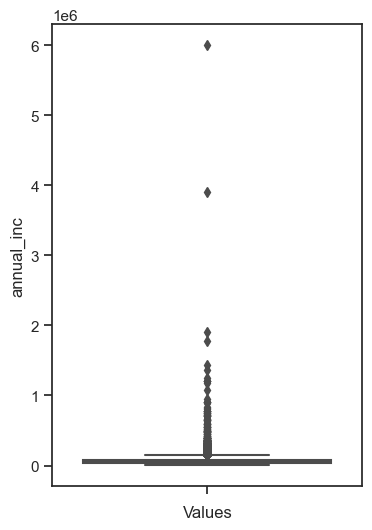

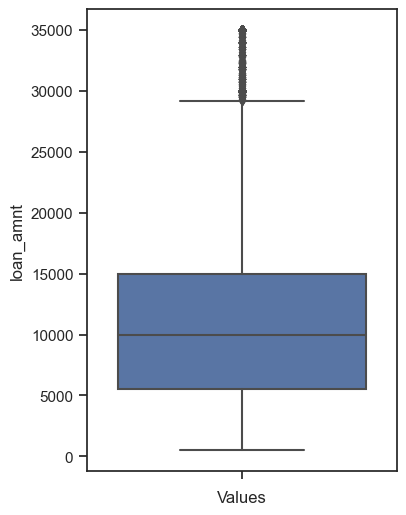

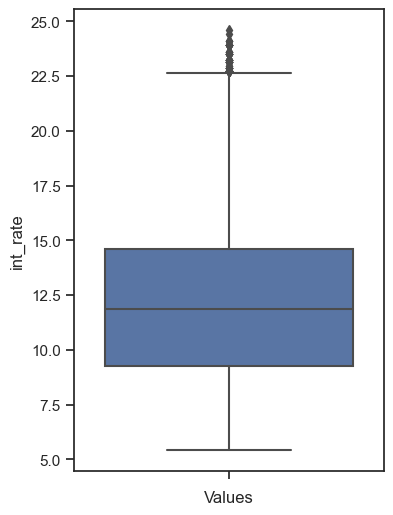

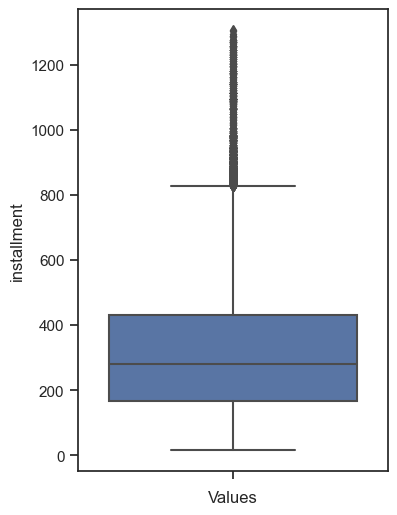

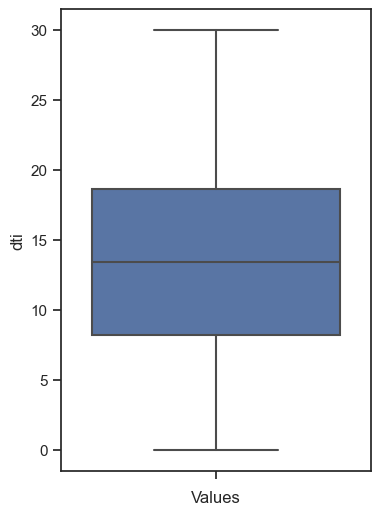

In [39]:
for col in ['annual_inc','loan_amnt',  'int_rate', 'installment', 'dti']:
    create_boxplot(loan_df, col,horizontal=False)

### 3.12. Derived columns

1.Created columns issue_m and issue_y to show the month and year of loan issuance from the issue_d column.

2.Created a new column annual_inc_bucket by categorizing annual income into the following buckets: ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']

3.Created a new column int_rate_bucket by categorizing interest rate  into the following buckets:['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']  

4.Created a new column loan_amnt_bucket by categorizing loan amount  into the following buckets: ['0- 5K', '5K - 10K', '10K - 15K', '15K - Above']

5.Created a new column funded_amnt_bucket by categorizing funded amount  into the following buckets:['0 - 5k', '5k - 10k', '10k - 15k', '15k - Above']

6.Created a new column dti_bucket by categorizing debt to income ratios  into the following buckets:['Very Low', 'Low', 'Medium', 'High', 'Very High','Extremely High']

#### Total 7 new columns derived based on existing data

In [40]:
# Create columns 'issue_m' and issue_y 

loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [41]:
# creating a function to check data distribution based on descriptive stats

def analyze_data_distribution(data, col):
 
    desc_stats = data[col].describe(percentiles=[.01, .1, .25, .5, .75, .9, .99]).astype('int64') # calulating diffrent percentiles

    # Calculate IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    print( desc_stats)
    print(f"IQR for '{col}': {IQR}")
    
 

In [42]:
analyze_data_distribution(loan_df,'annual_inc') # chekcing the data distribution

count      39020
mean       68958
std        63155
min         4000
1%         14400
10%        30000
25%        40800
50%        59000
75%        82404
90%       116000
99%       234485
max      6000000
Name: annual_inc, dtype: int64
IQR for 'annual_inc': 41604.0


####  Creating different buckets for  annual_inc (annual_inc_bucket) loan_amnt (loan_amnt_bucket), int_rate(int_rate_bucket)), funded_ amnt (funded_amnt_bucket), dti (dti_bucket)

In [43]:
# bucketting annual income

annual_inc_thresholds = [0,  40000, 50000, 60000,70000,80000, loan_df['annual_inc'].max()]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']

# Create the buckets 
loan_df['annual_inc_bucket'] = pd.cut(loan_df['annual_inc'], bins=annual_inc_thresholds, labels=annual_inc_labels, right=False)

In [44]:
loan_df[['annual_inc','annual_inc_bucket']].head()

,annual_inc,annual_inc_bucket
0,24000,0 - 40k
1,30000,0 - 40k
2,12252,0 - 40k
3,49200,40k - 50k
4,80000,80k - above


In [45]:
analyze_data_distribution(loan_df,'int_rate')  # chekcing the data distribution

count    39020
mean        12
std          3
min          5
1%           5
10%          7
25%          9
50%         11
75%         14
90%         17
99%         20
max         24
Name: int_rate, dtype: int64
IQR for 'int_rate': 5.359999999999999


In [46]:
# bucketting interest rate

int_rate_thresholds = [0,5,9,13,17,21, loan_df['int_rate'].max()]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']

# Create the buckets 
loan_df['int_rate_bucket'] = pd.cut(loan_df['int_rate'], bins=int_rate_thresholds, labels=int_rate_labels, right=False)

In [47]:
loan_df[['int_rate','int_rate_bucket']].head()

,int_rate,int_rate_bucket
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
4,12.69,9%-13%


In [48]:
analyze_data_distribution(loan_df,'loan_amnt')  # chekcing the data distribution

count    39020
mean     11242
std       7472
min        500
1%        1200
10%       3200
25%       5500
50%      10000
75%      15000
90%      22000
99%      35000
max      35000
Name: loan_amnt, dtype: int64
IQR for 'loan_amnt': 9500.0


In [49]:
# bucketting loan_amount

loan_amnt_thresholds = [0,5000,10000,15000,loan_df['loan_amnt'].max()]
loan_amnt_labels = ['0- 5K', '5K - 10K', '10K - 15K', '15K - Above']

# Create the buckets
loan_df['loan_amnt_bucket'] = pd.cut(loan_df['loan_amnt'], bins=loan_amnt_thresholds, labels=loan_amnt_labels, right=False)

In [50]:
loan_df[['loan_amnt','loan_amnt_bucket']].head()

,loan_amnt,loan_amnt_bucket
0,5000,5K - 10K
1,2500,0- 5K
2,2400,0- 5K
3,10000,10K - 15K
4,3000,0- 5K


In [51]:
analyze_data_distribution(loan_df,'funded_amnt')  # chekcing the data distribution

count    39020
mean     10967
std       7200
min        500
1%        1200
10%       3200
25%       5400
50%       9650
75%      15000
90%      21000
99%      35000
max      35000
Name: funded_amnt, dtype: int64
IQR for 'funded_amnt': 9600.0


In [52]:
# Bucketting Funded Amount

funded_amnt_thresholds = [0,5000, 10000, 15000,loan_df['funded_amnt'].max()]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - Above']

# Create the buckets 
loan_df['funded_amnt_bucket'] = pd.cut(loan_df['funded_amnt'], bins=funded_amnt_thresholds, labels=funded_amnt_labels, right=False)

In [53]:
loan_df[['funded_amnt','funded_amnt_bucket']].head()

,funded_amnt,funded_amnt_bucket
0,5000,5k - 10k
1,2500,0 - 5k
2,2400,0 - 5k
3,10000,10k - 15k
4,3000,0 - 5k


In [54]:
analyze_data_distribution(loan_df,'dti')  # chekcing the data distribution

count    39020
mean        13
std          6
min          0
1%           0
10%          4
25%          8
50%         13
75%         18
90%         22
99%         26
max         29
Name: dti, dtype: int64
IQR for 'dti': 10.399999999999999


In [55]:
# Bucketting DTI

dti_thresholds = [0,8, 12, 16, 20, loan_df['dti'].max()]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

loan_df['dti_bucket'] = pd.cut(loan_df['dti'], bins=dti_thresholds, labels=dti_labels, right=False)


In [56]:
loan_df[['dti','dti_bucket']].head()

,dti,dti_bucket
0,27.65,Very High
1,1.00,Very Low
2,8.72,Low
3,20.00,Very High
4,17.94,High


In [57]:
# checking the updated data frame

loan_df.shape 

(39020, 28)

In [58]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,pub_rec,pub_rec_bankruptcies,issue_m,issue_y,annual_inc_bucket,int_rate_bucket,loan_amnt_bucket,funded_amnt_bucket,dti_bucket
0,5000,5000,4975,36,10.65,162.87,B,B2,Unknown,10,...,27.65,0,0,12,2011,0 - 40k,9%-13%,5K - 10K,5k - 10k,Very High
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,0,...,1.00,0,0,12,2011,0 - 40k,13%-17%,0- 5K,0 - 5k,Very Low
2,2400,2400,2400,36,15.96,84.33,C,C5,Unknown,10,...,8.72,0,0,12,2011,0 - 40k,13%-17%,0- 5K,0 - 5k,Low
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,20.00,0,0,12,2011,40k - 50k,13%-17%,10K - 15K,10k - 15k,Very High
4,3000,3000,3000,60,12.69,67.79,B,B5,University Medical Group,1,...,17.94,0,0,12,2011,80k - above,9%-13%,0- 5K,0 - 5k,High


### 3.13. Create a subset fo data frame only for loan_status ='Charged Off'

In [59]:
loan_df_chargedoff=loan_df[loan_df['loan_status']=='Charged Off']

In [60]:
loan_df_chargedoff.shape

(5509, 28)

### 3.14. create a subset of data frame for loan_status  'Fully paid' & 'Charged Off'

In [61]:
loan_df_fully_paid_defaulted=loan_df[loan_df['loan_status'] !='Current']

In [62]:
loan_df_fully_paid_defaulted.shape

(37880, 28)

## 4 .Univariate Analysis

The columns to be considered for univariate analysis

1.Categorical variable  

    Ordered:  
            1.grade  
            2.sub_grade  
            3.emp_length  
            4.issue_m  
            5.issue_y 
            6.term  
    unordered:   
            1.home_ownership  
            2.verification_status  
            3.purpose  
            4.addr_state           
#### 2.Quantitative (instead of using direct quantitative columns from the data, we will be using derived or bucketed versions of these columns)  

     1.annual_inc_bucket  
     2.loan_amnt_bucket  
     3.funded_amnt_bucket  
     4.dti_bucket  
     5.int_rate_bucket  
     6.installment  

In [63]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'pub_rec',
       'pub_rec_bankruptcies', 'issue_m', 'issue_y', 'annual_inc_bucket',
       'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket',
       'dti_bucket'],
      dtype='object')

In [64]:
# defining  function to create count plots

def create_cntplt(data, col, title=None, show_percentages=True):
    
    if col not in data.columns:
        print(f"Error: The column '{col}' is not available in the data.")
        return
    
    plt.figure(figsize=(8,6), facecolor='white')
    sns.set_style('whitegrid')
    
    ax = sns.countplot(x=col, data=data) 
    
    plt.title(title if title else f"Count Plot of {col}", fontsize=18, fontweight='bold')
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12) 
    
    if show_percentages:
        total = len(data)  
        for p in ax.patches:
            value = p.get_height() 
            percentage = f'{round(100 * value / total, 2)}%' 
            
            # Display value in the middle of the bar
            ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., value / 2), 
                        ha='center', va='center', fontsize=12, color='white')
            
            # Display percentage above the bar
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., value), 
                        ha='center', va='bottom', fontsize=12, color='black')
    

    plt.show()



### 4.3. Detailed analysis on overall loan application
        Lets first analyse the the oerall loans provided by the company with respect to diffrent parameters

#### 4.3.1.'Loan Application Across Year
1. There has been a significant increase in loan applications across the years from 2007 to 2011.  

2. There was an approximately 88% increase in loan applications in 2011 compared to 2010, which represents the highest growth observed within the timeframe considered.  
#### 4.3.2 Loan Status 

1.out of the total loans issues around 14 % of the loans are gtting defaulted

#### 4.3.3 'Loan Applications by Applicant Employment Tenure
1.Around 25 % of loan applicants is having 10 or more years of employement tenure



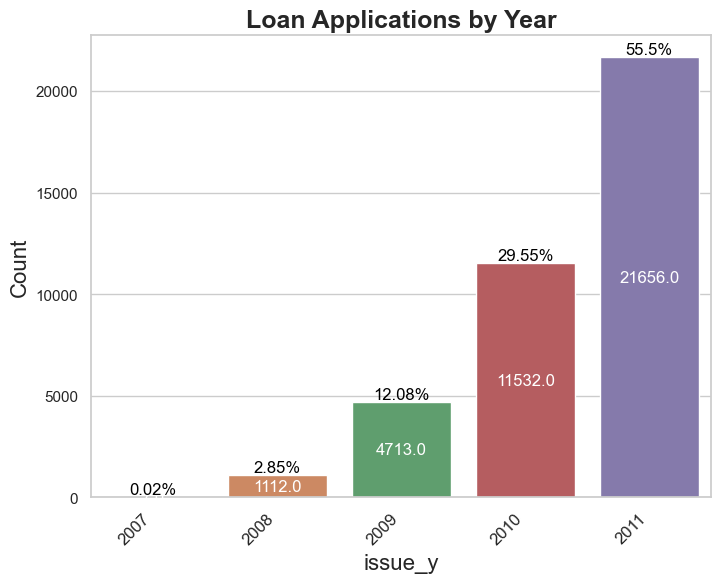

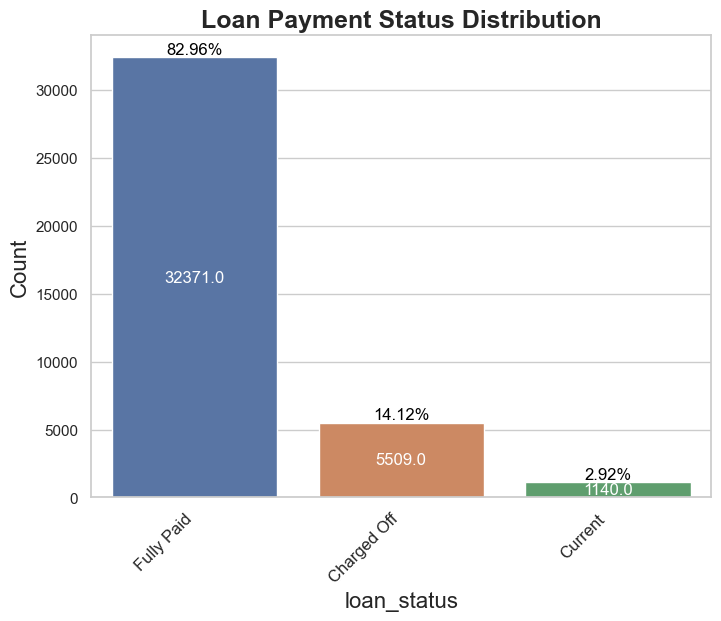

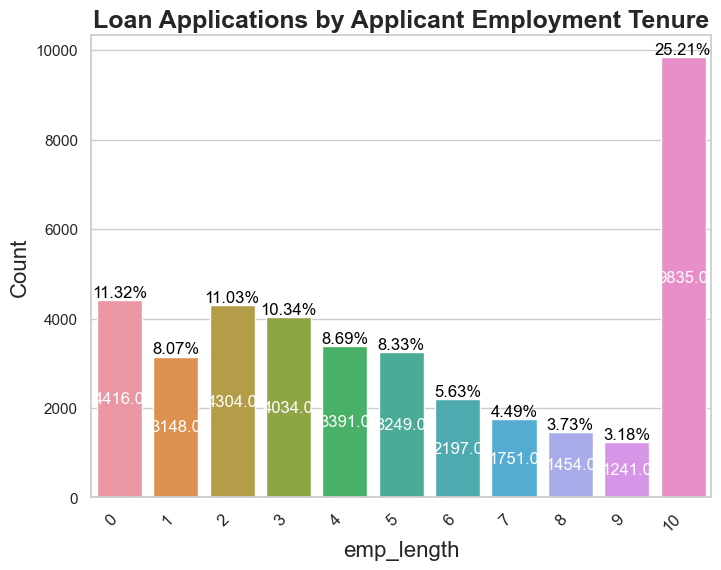

In [65]:

title = [ 'Loan Applications by Year','Loan Payment Status Distribution',
        'Loan Applications by Applicant Employment Tenure']
i = 0
for col in ['issue_y', 'loan_status','emp_length']:
    create_cntplt(loan_df, col,title=title[i]) 
    i += 1


###  4.4.   Analysis on "charged_off" loans   for ordered cat variables.  

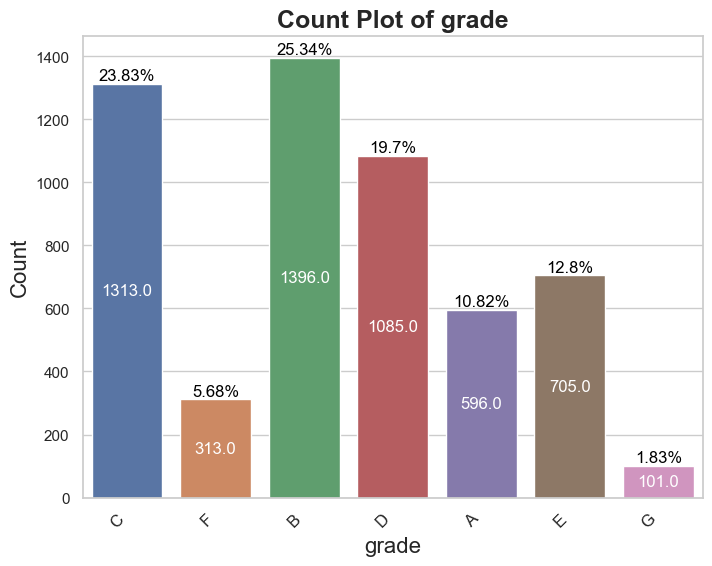

Error: The column 'sub_grade ' is not available in the data.


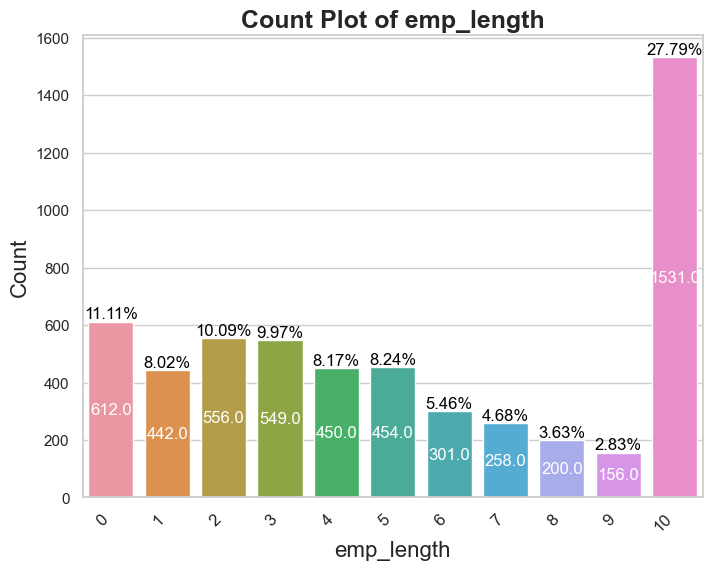

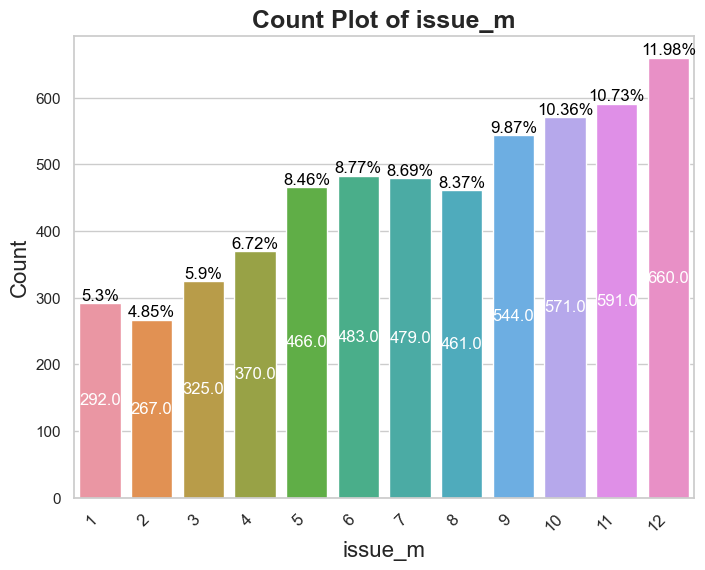

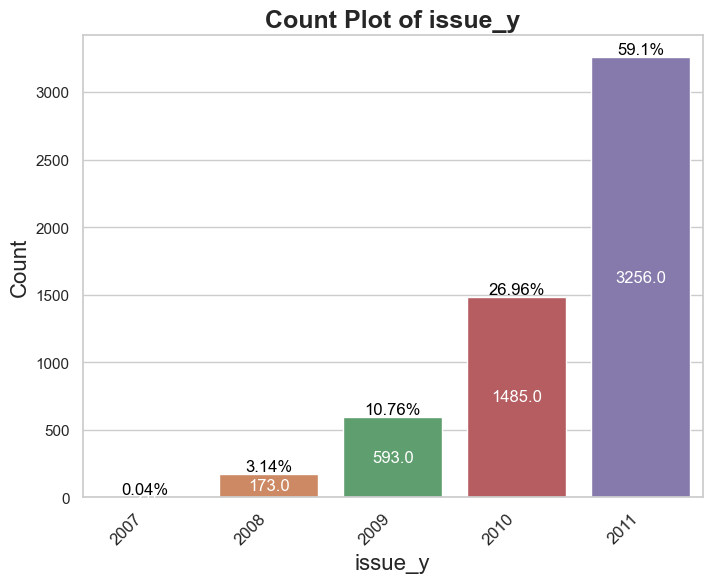

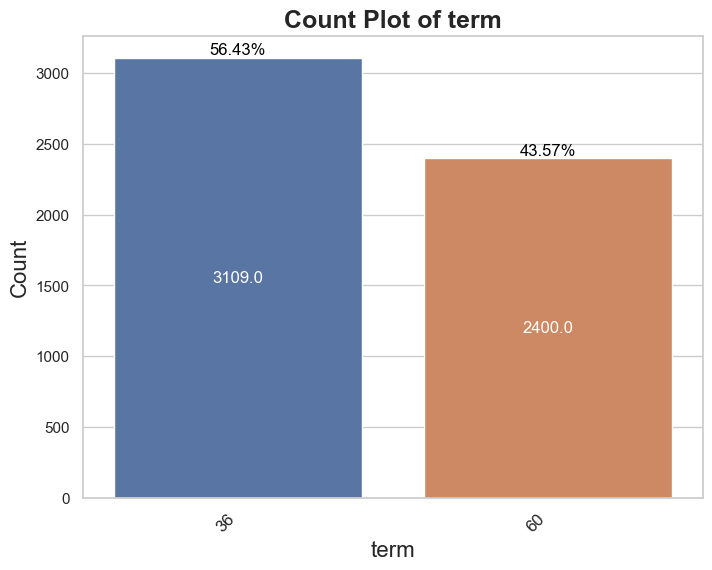

In [66]:
# calling the function to craete countplots

for col in ['grade','sub_grade ','emp_length','issue_m','issue_y','term']:
    create_cntplt(loan_df_chargedoff,col)

###  4.5.   Analysis on "charged_off" loans   for un ordered cat variables.  

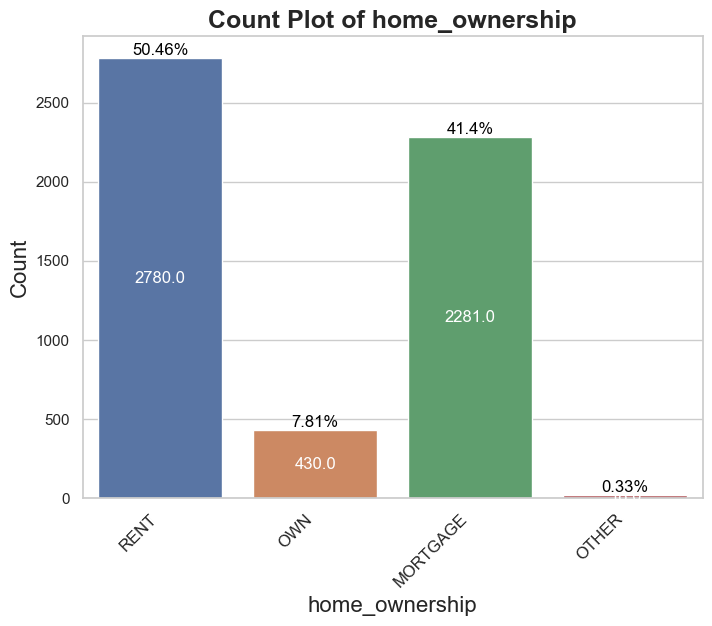

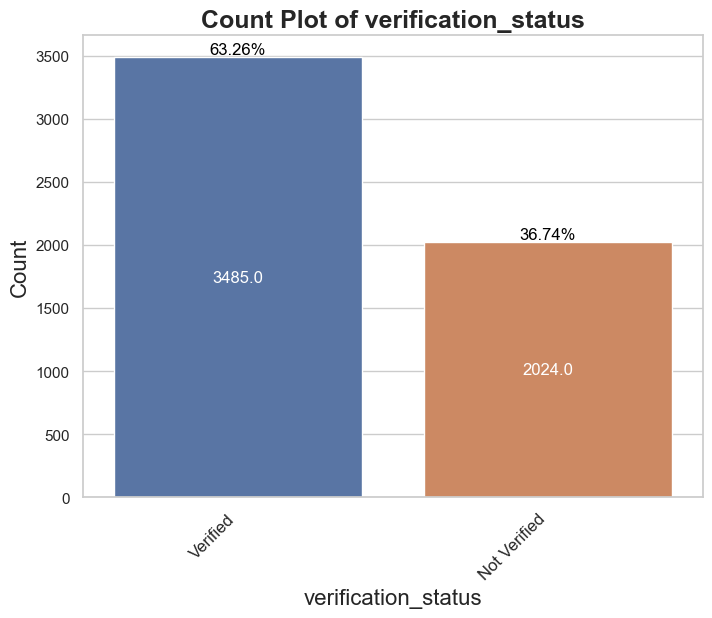

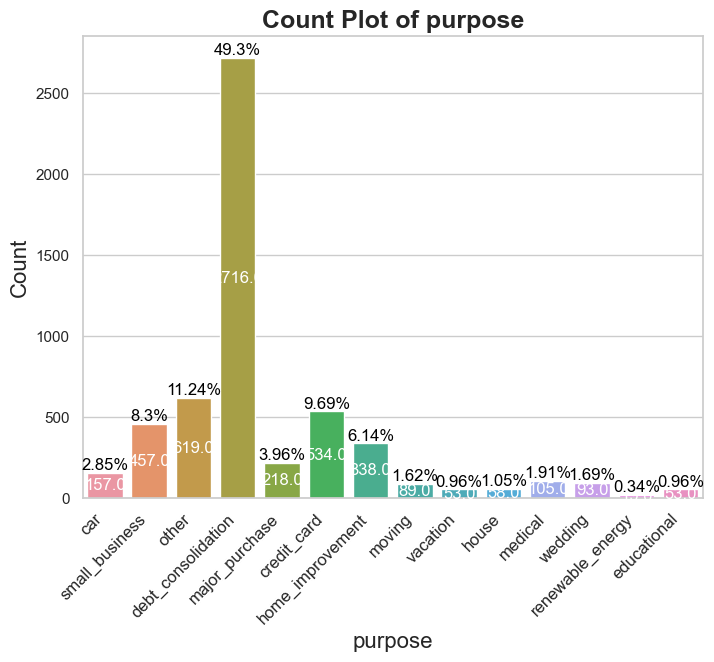

In [67]:
# calling the function to craete countplots

for col in ['home_ownership','verification_status','purpose']:
    create_cntplt(loan_df_chargedoff,col)

#### since addr_state is having too many unique values grpah becomes clumpsy, so we will plot 10 largest states

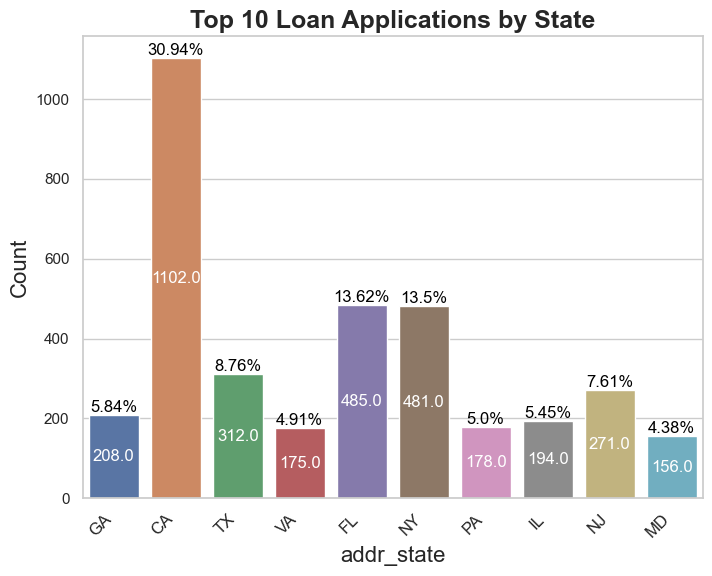

In [68]:
#  top 10 most frequent states
top_n_states = loan_df_chargedoff['addr_state'].value_counts().nlargest(10).index
filtered_df = loan_df_chargedoff[loan_df_chargedoff['addr_state'].isin(top_n_states)]


# Calling the fucntion to create count plot
create_cntplt(filtered_df, 'addr_state', title='Top 10 Loan Applications by State')


###  4.5.   Analysis on "charged_off" loans   for  quantitative(Bucketed version)  variables.  

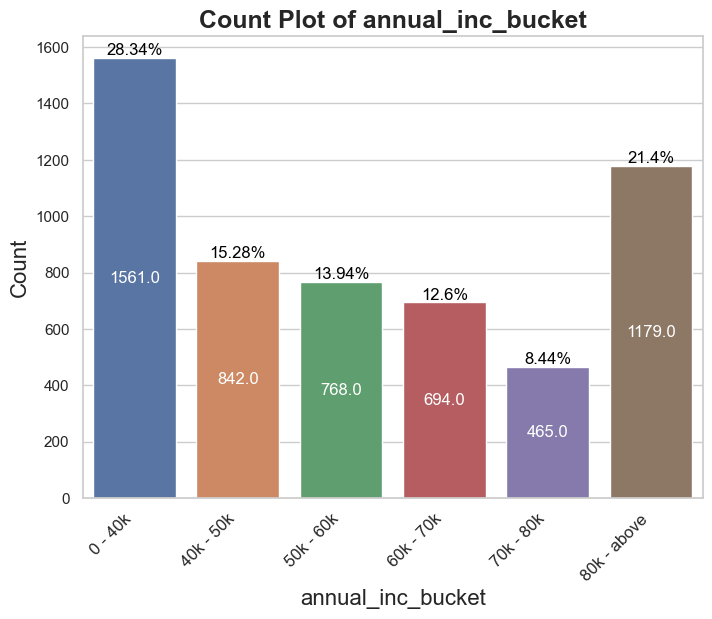

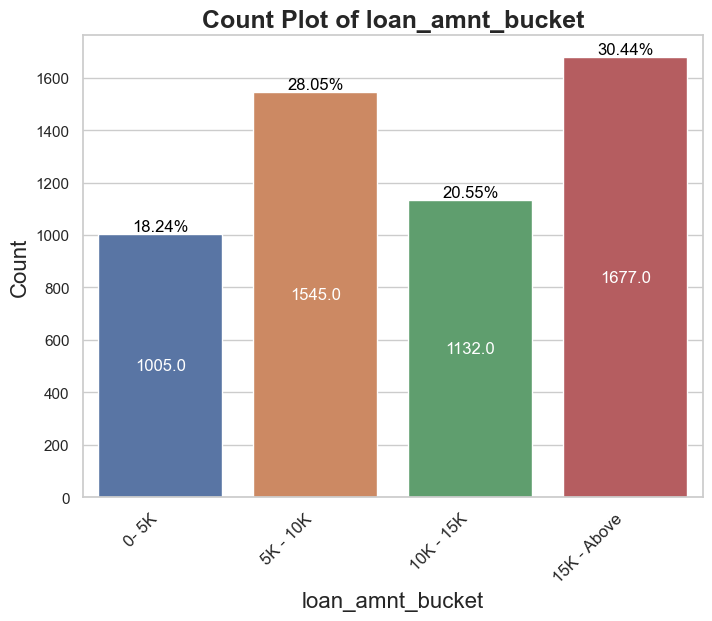

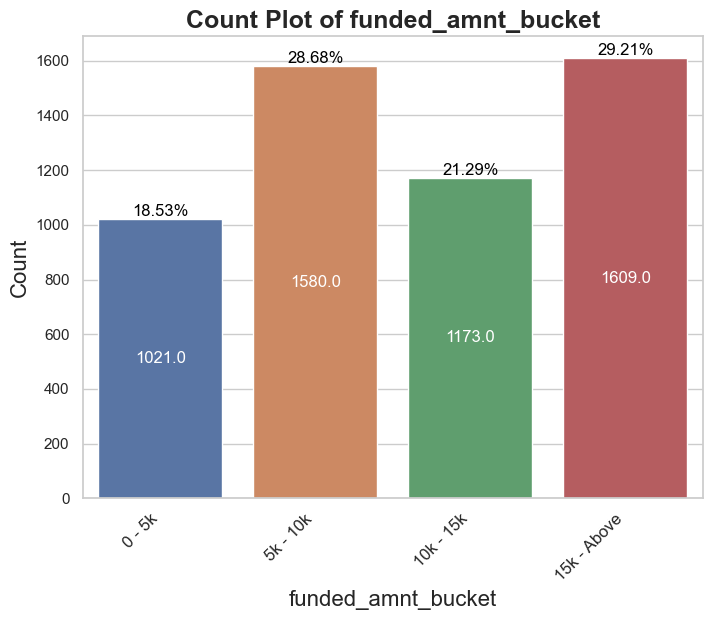

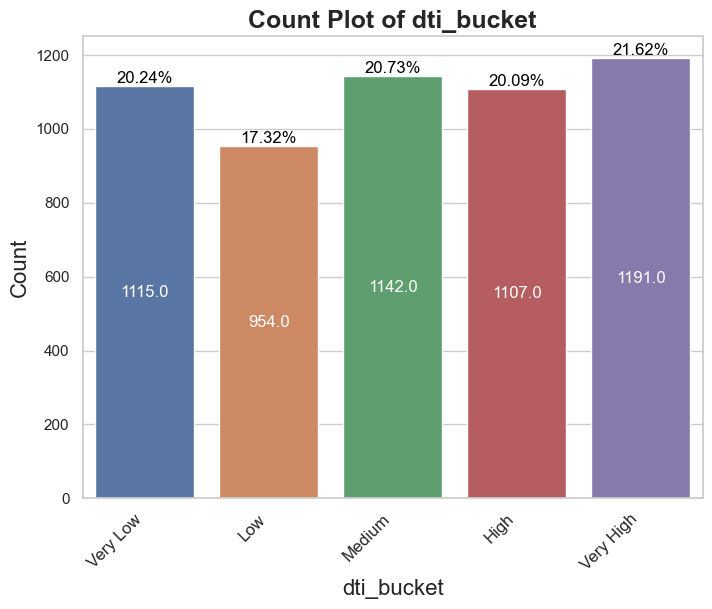

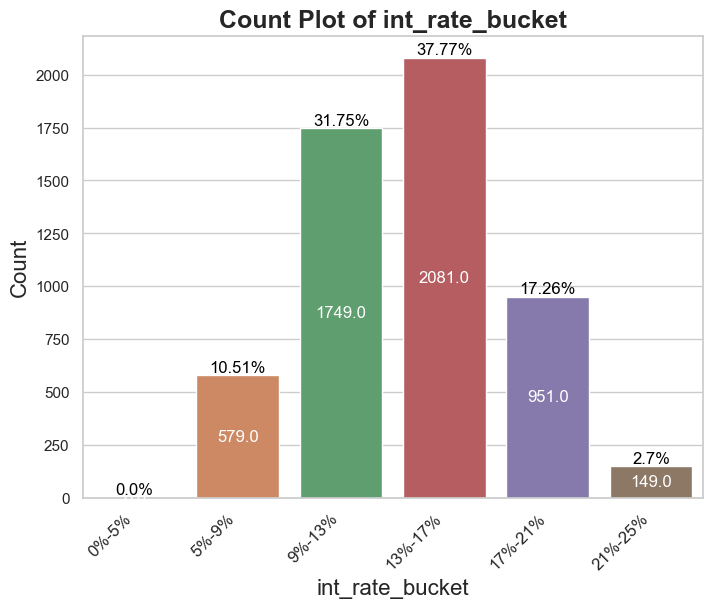

In [69]:
# calling function to craete count plots

for col in ['annual_inc_bucket','loan_amnt_bucket','funded_amnt_bucket','dti_bucket','int_rate_bucket']:
    create_cntplt(loan_df_chargedoff,col)

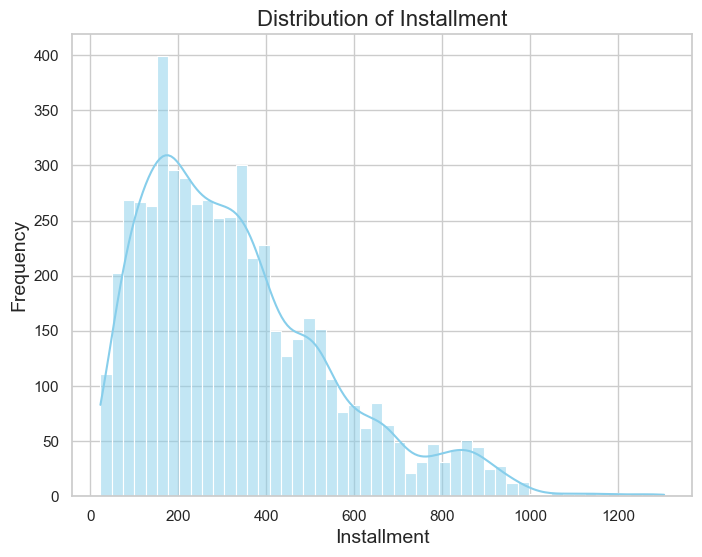

In [70]:
## creating an hsitogram for installement


plt.figure(figsize=(8, 6))

sns.set_style('whitegrid')

# Creating the histogram of the 'installment' column with 50 bins
sns.histplot(data=loan_df_chargedoff, x='installment', bins=50, color='skyblue',kde=True)

plt.title('Distribution of Installment', fontsize=16)
plt.xlabel('Installment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

### 4.6. Findings from Univariate Analysis

#### 4.6.1 Ordered categorical variables

1.Among the charged-off loan applicants, Grade 'B' stands out with the highest count, comprising 25.34% of the total at 1,396 applicants. This trend suggests that borrowers in the 'B' grade category are experiencing significant challenges in loan repayment, highlighting a potential risk for lenders in this demographic.   

2.Aplicants with over 10 years of employment account for the largest share of charged-off loans, representing 27.79% or 1,431 cases. This finding indicates that a lengthy employment history does not necessarily correlate with successful loan repayment, suggesting that other factors may influence borrowers' financial stability.

3.A notable observation is that the majority of charged-off loans were originated in December.

4.The year 2011 marked a peak in charged-off loan applications, contributing 59.1% of the total with 3,256 applications. This significant increase reflects a  trend of rising defaults, likely by the global economic crisis prevailed at that time which  affected many individuals during this period.  

5.Short-term loans with a duration of 36 months were the most popular among Charged Off applicants, totaling 3,109 applications. This indicates that many applicants who defaulted preferred shorter repayment terms.


#### 4.6.2  Un ordered categorical variables  

1.Approximately 50% of charged-off loan participants, totaling 2,780 individuals, reside in rented accommodations. This situation suggests that a significant portion of their income is likely allocated to rent payments, which may adversely affect their ability to repay loans. It underscores the need for lenders to consider housing stability when assessing loan applications.  

2.Notably, 36% of defaulters have unverified income sources, heightening the risk of loan defaults. This gap in verification indicates that lending companies should prioritize thorough income assessments to mitigate potential defaults and ensure borrowers have the financial capability to manage their obligations.

3.A significant 49.3% of charged-off loan applicants indicated that debt consolidation was their primary loan purpose. This statistic highlights a crucial area of concern for lenders, who should exercise caution when approving loans for debt consolidation purposes. Understanding the reasons behind these loans can help lenders make more informed decisions and potentially reduce default rates.

4.California stands out with the highest number of charged-off loan applicants, totaling 1,102 individuals. Given this elevated risk, lending companies should consider implementing stricter eligibility criteria and more rigorous credit assessments for applicants from this state. Tailoring risk management strategies to specific regions can enhance overall loan performance and reduce default rates.

#### 4.6.3. Quantitative Variables

1.Approximately 28.34% of loan applicants who defaulted had annual salaries below 40,000, totaling 1,561 individuals. The lending company should be cautious when approving loans for applicants with low incomes. It is crucial to conduct thorough income verification and evaluate their ability to repay loans.

2.About 30.44% of charged-off loan applicants, totaling 1,677 individuals, received loan amounts of 15,000 or more. The lending company should carefully assess these applicants, ensuring they have a solid credit history and sufficient repayment capacity for larger loans.

3.Around 21.62 % and  loan participants who charged off, 1191 loan applicants had very high debt-to-income ratios. The lending company should implement strict debt-to-income ratio requirements to prevent lending to individuals with unsustainable levels of debt relative to their income.

4.Around 37% of loan participants who defaulted, totaling 2,081 individuals, had interest rates between 13% and 17%. To help reduce the risk of defaults, the lending company might consider offering loans at lower interest rates when feasible.  

5.Most charged-off loan participants had monthly installments ranging from 180 to 420. The lending company should closely monitor applicants with similar installment amounts to lower the risk of defaults.



### 5.Bivariate Analysis

The columns to be considered for bivariate analysis

1.Categorical variable  

    Ordered:  
            1.grade  
            2.sub_grade  
            3.emp_length  
            4.issue_m  
            5.issue_y 
            6.term  
    unordered:   
            1.home_ownership  
            2.verification_status  
            3.purpose  
            4.addr_state           
#### 2.Quantitative (instead of using direct quantitative columns from the data, we will be using derived or bucketed versions of these columns)  

     1.annual_inc_bucket  
     2.loan_amnt_bucket  
     3.funded_amnt_bucket  
     4.dti_bucket  
     5.int_rate_bucket  
     6.installment  


### 5.1. Bivariate analysis of ordered Categorical variable

In [71]:
# defining function to create countplot for bivaraite analysis

def create_countplot_cat(data, x: str, hue=None, annot=True):
    # Set default figure size
    figsize = (10, 6)


    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=data, palette='Set2', ax=ax)

    # Set default labels and title
    ax.set_xlabel(x)
    ax.set_ylabel('Count')
    ax.set_title(f'{x} vs {hue}')


    if annot and x not in ['sub_grade','addr_state']:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.0f}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    if x == 'purpose':
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
        
    plt.show()



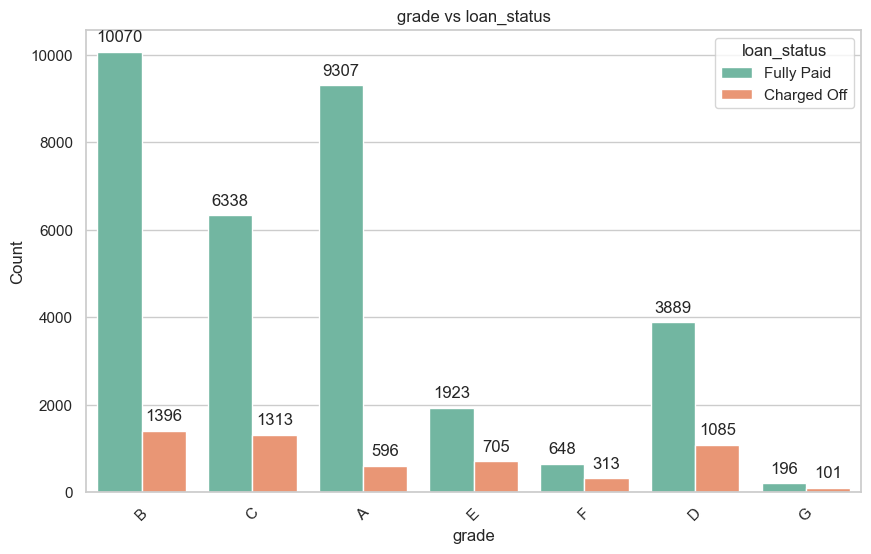

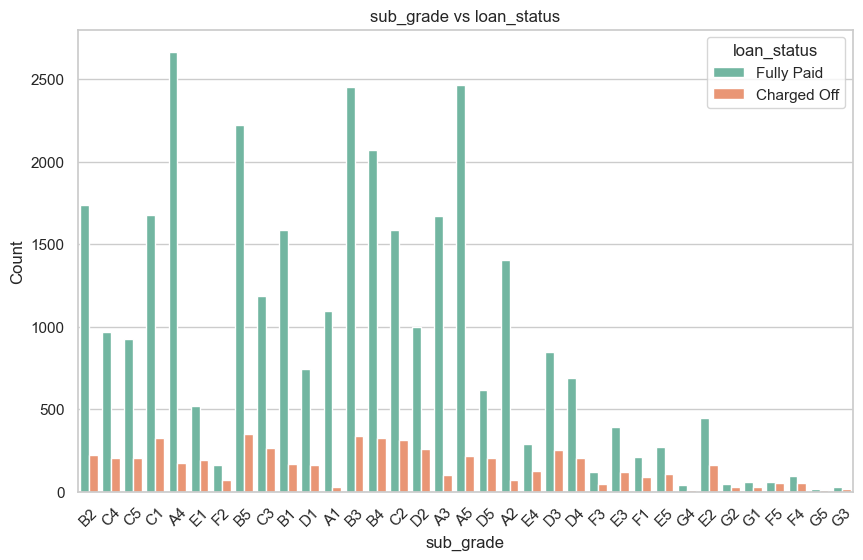

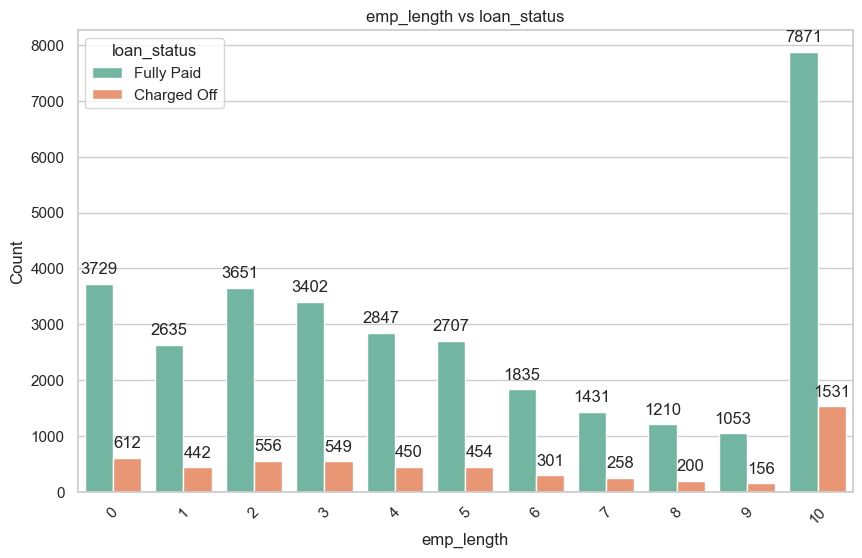

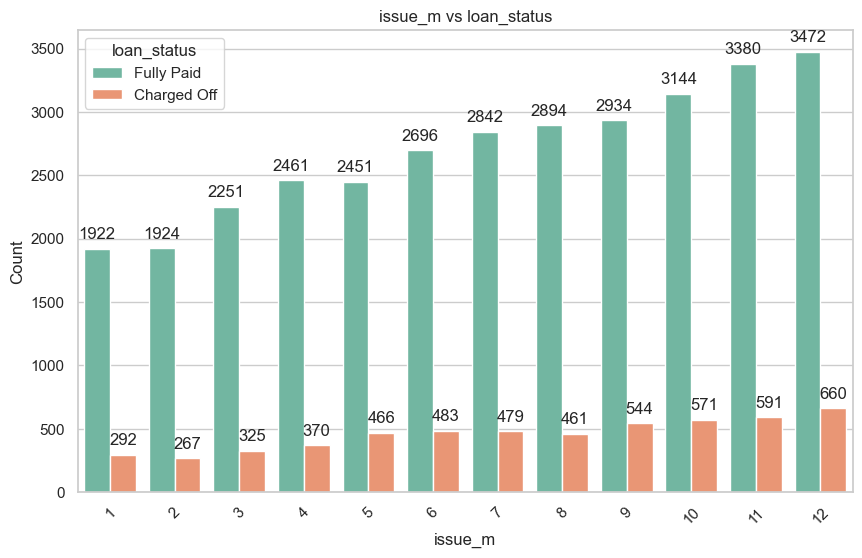

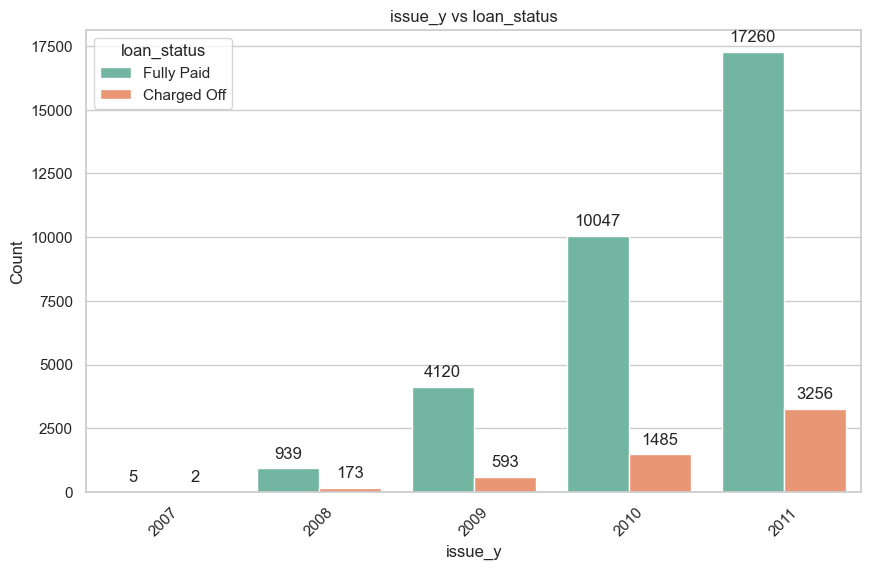

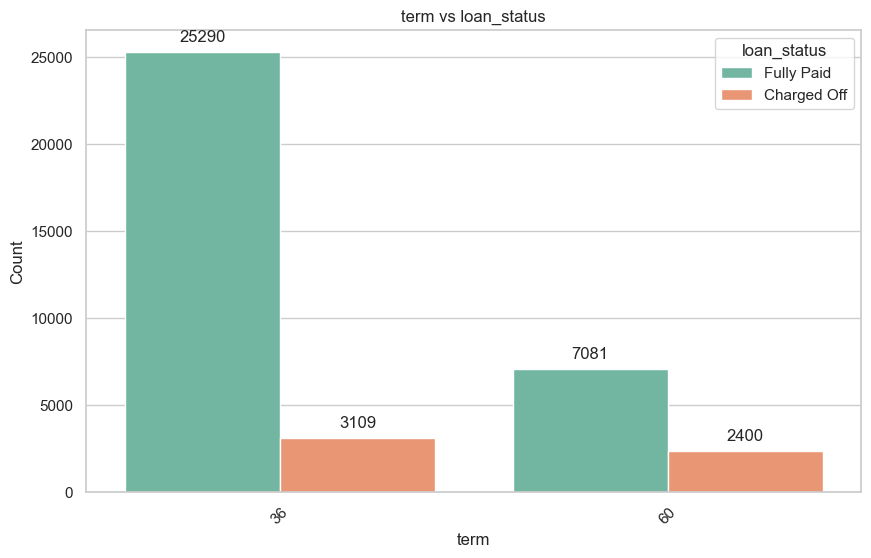

In [72]:
for col in ['grade','sub_grade','emp_length','issue_m','issue_y','term']:
    create_countplot_cat(loan_df_fully_paid_defaulted,col,hue='loan_status')
        

### 5.1.1 Findings from Bivariate analysis of ordered categorical variable

1."Grade vs Loan Status"-- The majority of "Charged Off" loans are attributed to loan applicants belonging to Grades B, C, and D. These grades represent a significant risk for loan defaults, suggesting that borrowers with lower creditworthiness (as indicated by their grade) are more likely to default.  

2."Sub grade vs Loan status" -- Within the B grade category, Sub-Grades B3, B4, and B5 show a higher likelihood of "Charged Off" loans. This indicates that even small variations within the same grade can reflect different levels of risk, with B3, B4, and B5 applicants being more prone to default compared to others in the B grade.

3."Employement Length vs Loan Status" -- A large proportion of loan applicants have 10 or more years of experience, and interestingly, this group also has the highest rate of loan defaults. This  trend suggests that long-term work experience does not necessarily correlate with lower default risk, possibly due to other factors like loan size or financial commitments. 

4."issue month vs Loan Status" --The month of December emerges as the most popular time for taking loans, likely driven by the holiday season and increased consumer spending. However, this trend could also be linked to a higher risk of defaults.  

5."issue year vs Loan status" -- The highest volume of loan applications occurred in 2011, and correspondingly, 2011 also saw the highest number of "Charged Off" loans. This could be reflective of Global economic crisis prevailed at that time, with a surge in loan demand followed by higher-than-average defaults during that period.

6"Loan Term vs Laon Status" -- Loan applicants opting for 60-month loan terms have a significantly higher likelihood of defaulting compared to those choosing 36-month terms. Longer loan terms may result in financial strain over time, leading to a higher chance of non-repayment.


### 5.2.  Bivariate Analysis of Unordered Categorical Variables

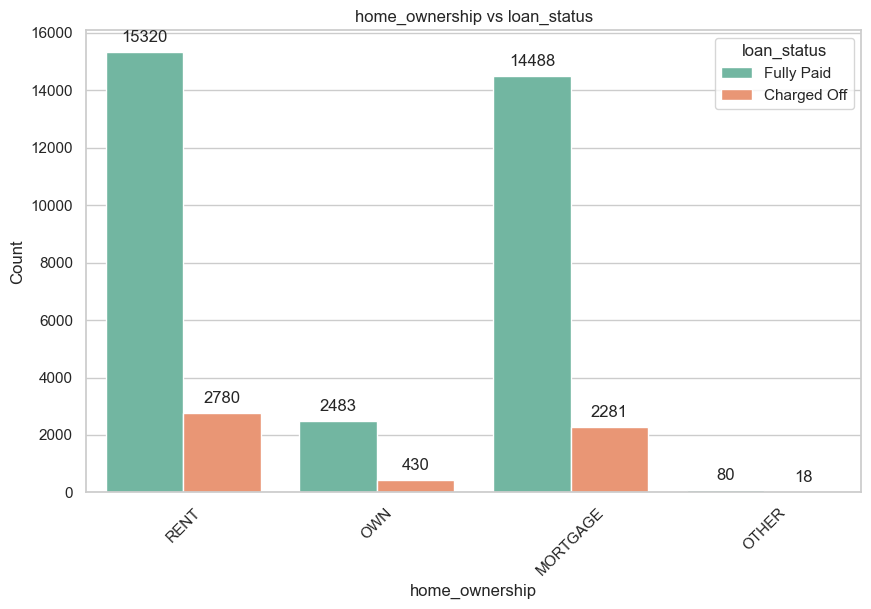

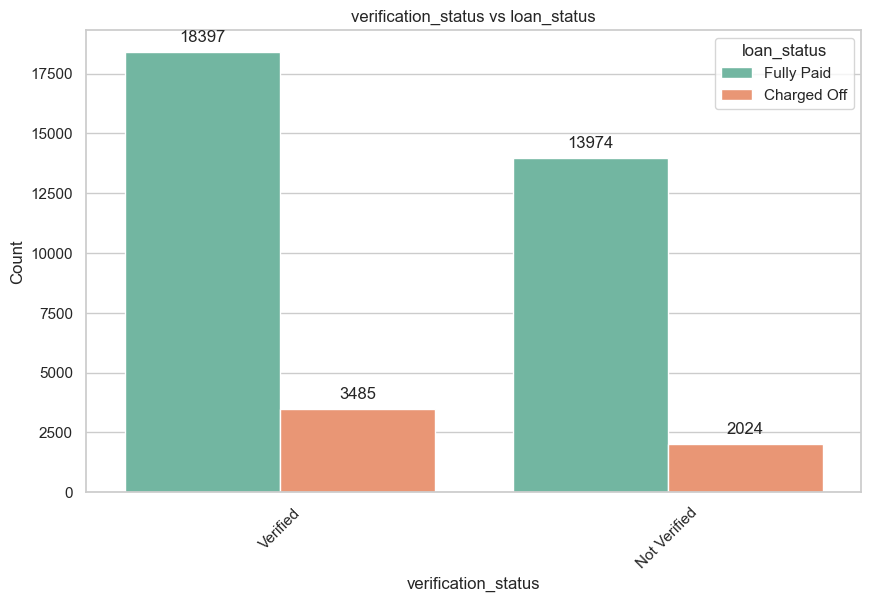

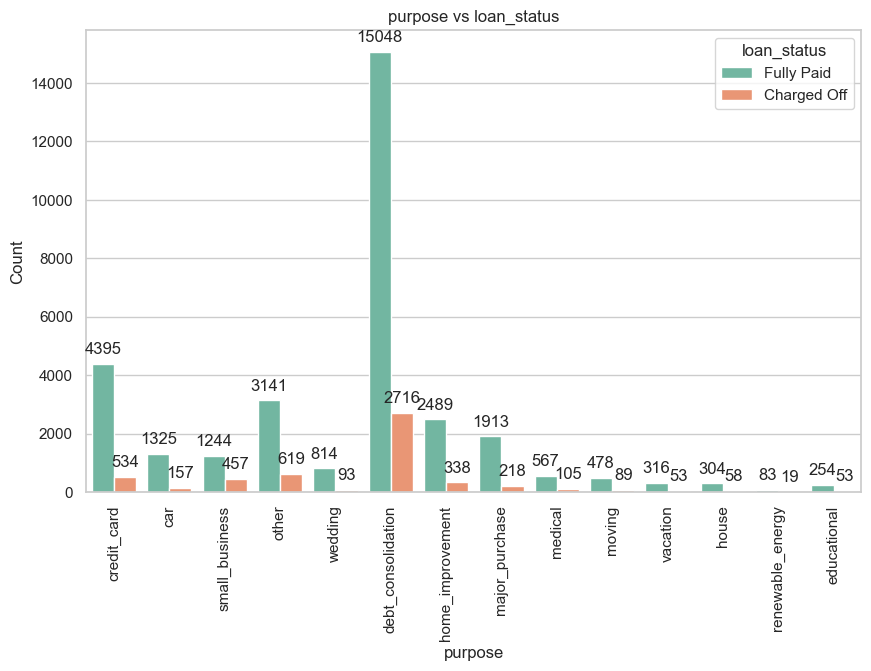

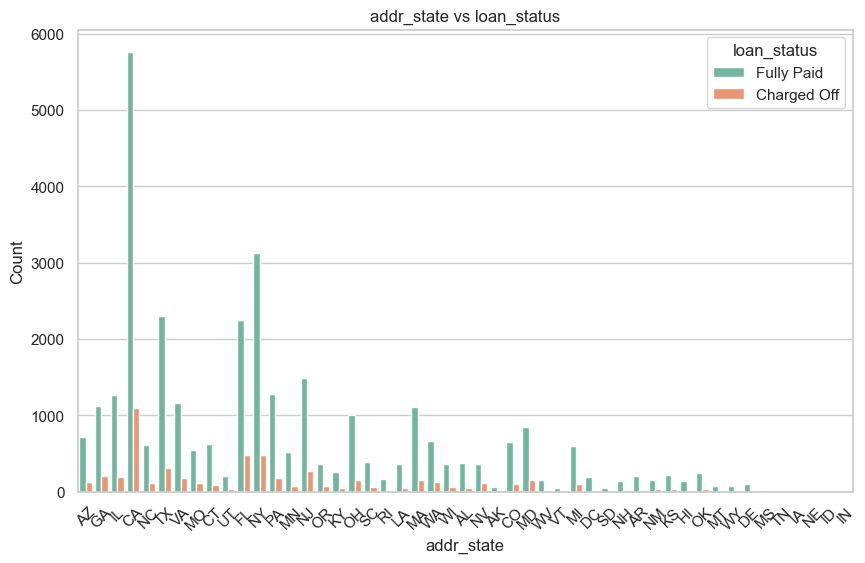

In [73]:
for col in ['home_ownership','verification_status','purpose','addr_state']:
    create_countplot_cat(loan_df_fully_paid_defaulted,col,hue='loan_status')
           

### 5.2.2 Findings from Bivariate analysis of unordered categorical variable

1."Home Ownership vs Loan Status" – Applicants who live in rented or mortgaged homes are more likely to default on loans. This insight can help the company consider housing stability when assessing someone's ability to repay.

2."Verification Status" – Verified applicants are defaulting more than those who aren’t verified. The company should revisit its verification process to ensure it's accurately assessing creditworthiness and look for ways to improve it.

3."Purpose vs Loan Status" – Debt consolidation loans have the most borrowers and the highest default rates. The company should be more cautious when approving these loans, potentially adjusting interest rates or offering financial advice to applicants.

4."State vs Loan Status" – Borrowers from California, Florida, and New York are more likely to default. The company should keep an eye on these states and consider adjusting lending strategies or rates to reduce risk.

### 5.3. Bivariate analysis of Quantitative variables

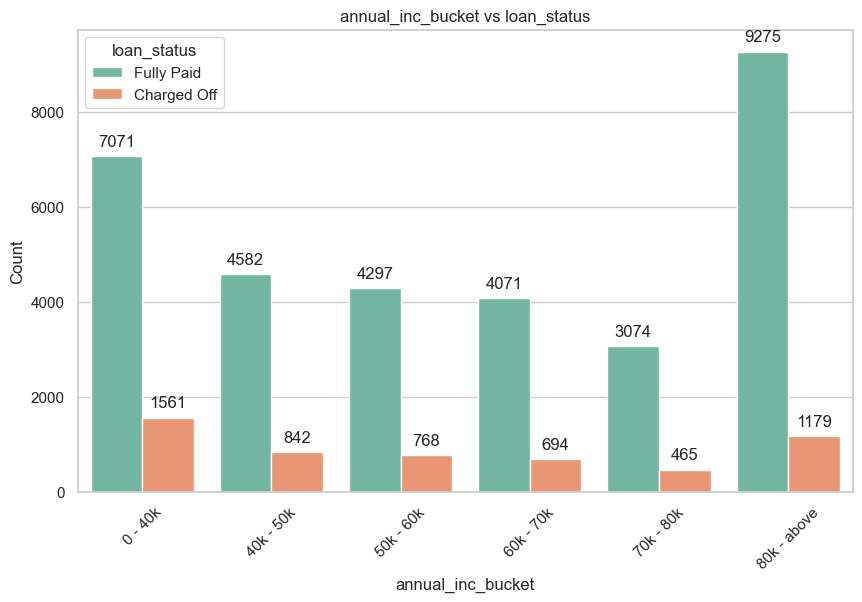

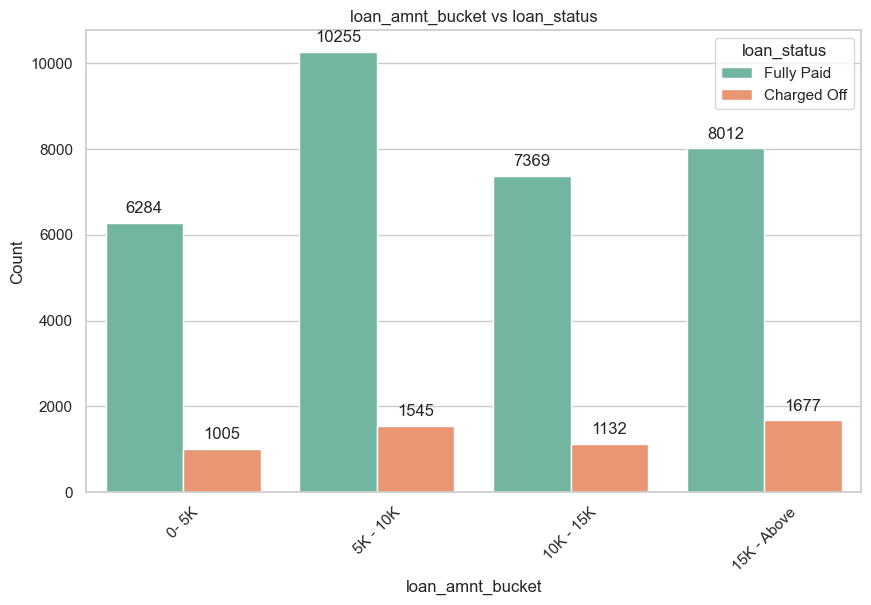

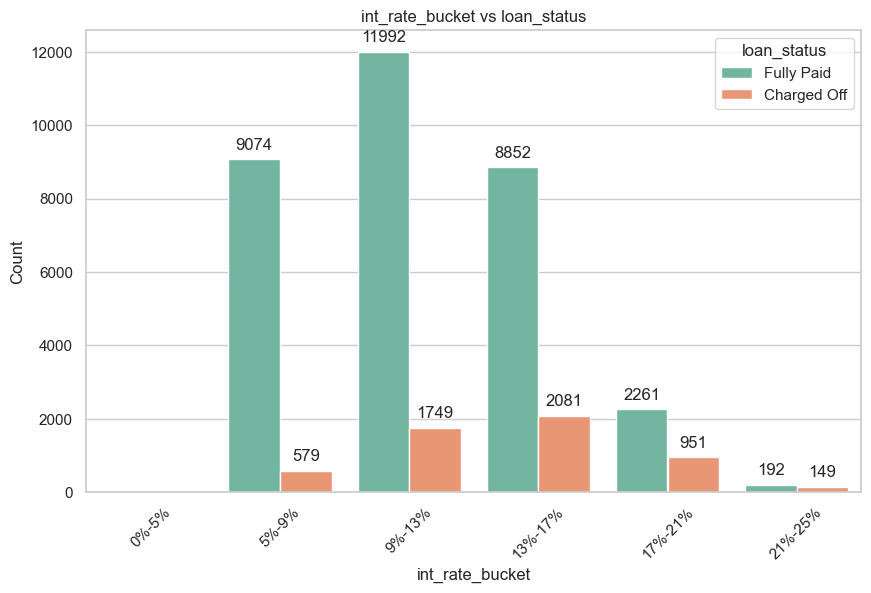

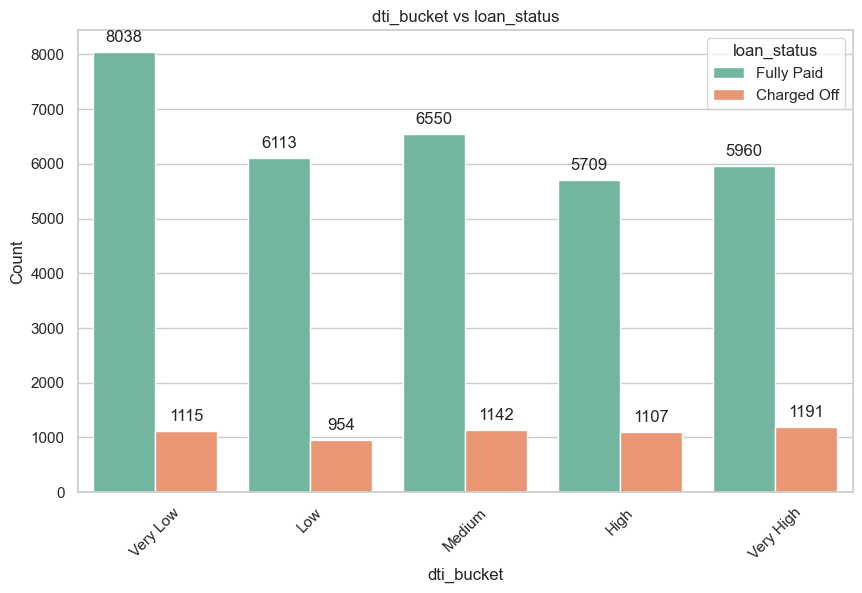

In [74]:
for col in ['annual_inc_bucket', 'loan_amnt_bucket', 'int_rate_bucket', 'dti_bucket', ]:
    create_countplot_cat(loan_df_fully_paid_defaulted,col,hue='loan_status')
    

### 5.3.1. Findings from  Bivariate analysis of Quantitative variables

1."Annual Income vs Loan Status" – Most applicants who defaulted on their loans reported an annual income below 40,000. This indicates that lower-income borrowers may struggle with repayment, and income level could be a key factor in assessing risk.

2."Loan Amount vs Loan Status" – A large number of applicants who defaulted took loans of 15,000 or more. This suggests that higher loan amounts could be riskier, and the company may want to adjust its approval criteria or interest rates for large loans.

3."Interest Rate vs Loan Status" – Many defaulted borrowers had loans with interest rates between 13% and 17%. This suggests that loans in this rate range might pose higher risks, and the company could explore offering lower rates for better-qualified borrowers or tightening approval for those in this range.

4."Debt-to-Income Ratio vs Loan Status" – Borrowers with significantly high Debt-to-Income (DTI) ratios were more likely to default. This shows that DTI is a strong indicator of potential default, and the company should consider more stringent DTI limits to reduce default risk.

### 5.4. Correlation Analysis

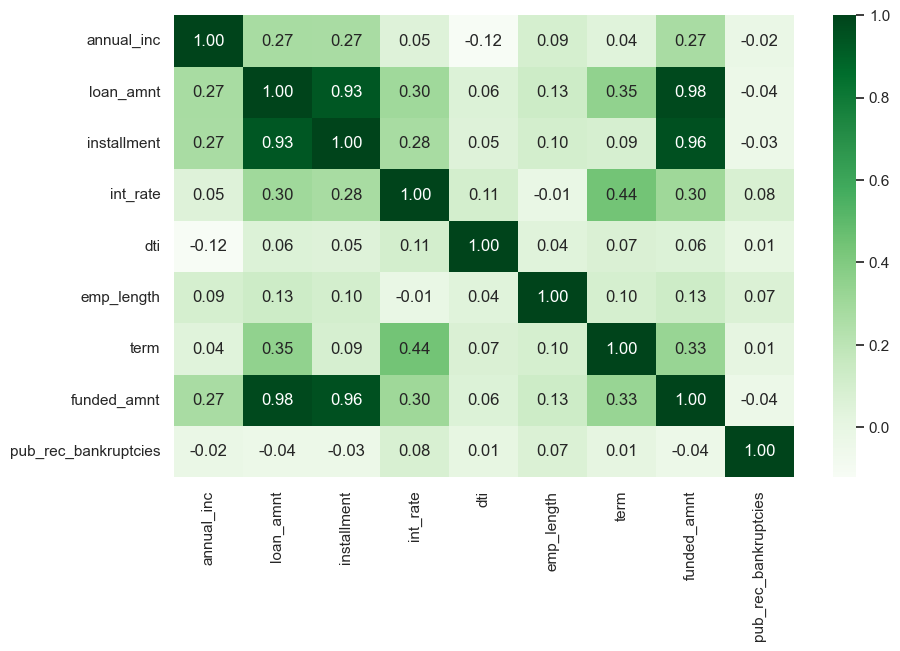

In [75]:
# columns considred  for correlation analysis
cols_for_corr_analysis = ['annual_inc', 'loan_amnt', 'installment', 'int_rate', 'dti', 
                          'emp_length', 'term', 'funded_amnt', 'pub_rec_bankruptcies']

# Filter the dataframe to include only the above selectedcolumns
loan_df_filtered = loan_df_fully_paid_defaulted[cols_for_corr_analysis]

# Calculate the correlation matrix
corr_matrix = loan_df_filtered.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f')

plt.show()

### 5.4.1. Findings from Correlation Analysis

1.Loan amount is highly positively correlated with the installment, as the loan amount increases, the installment payments also tend to rise.

2.The term of the loan shows a strong positive correlation with the interest rate, indicating that loans with longer terms are often associated with higher interest rates.

3.Annual income is negatively correlated with the debt-to-income (DTI) ratio, suggesting that applicants with higher incomes generally have lower DTI ratios.